In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random

In [24]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [25]:
import sys
sys.path.append('../')
from code_final.EBM import EBM, elbow_method

### Définition de constantes

In [26]:
#Nombre maximal de clusters que l'on va rechercher (détermination du nombre "exact" dans [NMIN_CLUSTERS, 
#NMAX_CLUSTERS] par elbow method) sur l'image
NMAX_CLUSTERS = 6

NMIN_CLUSTERS = 3

#Chemin (absolu ou relatif) menant à l'image à charger
FILE_PATH = "../image1.png"

#Proportion de pixels à sélectionner pour pouvoir appliquer l'algorithme EBM dessus
SELECTION_RATIO = 0.2

#Taille du CÔTÉ des carrés de pixels considérés pour la sélection aléatoire
SQUARE_SIZE = 30

#Pour régler la convergence de l'algorithme EBM
#Nombre de paramètres maximum qui doivent avoir changé pour pouvoir interrompre EBM
CONV_PARAMS = 4

#Nombre de points maximum qui doivent avoir changé de classes pour pouvoir interrompre EBM
CONV_POINTS = 500

#Nombre d'itérations minimum/maximum qui doivent être faites pour interrompre EBM
ITER_MIN = 10

ITER_MAX = 100

#Tolérance relative sur la différence de valeurs des paramètres entre deux itérations pour les 
#considérer comme étant égaux
TOL = 0.01

#Seuil de différence entre moyennes de deux classes en dessous duquel les deux classes sont fusionnées
#lors de la fusion finale
ABSOLUTE_FUSION_THRESHOLD = 10

#Chemin vers le dossier où enregistrer les résultats. Le dossier doit au moins exister (même si vide)
#Les fichiers existants avec le même nom que ceux enregistrés par le code ci-dessous seront écrasés
RESULTS_DIR = "../Resultats/Image1/"

#Quelle méthode de clustering utiliser sur les pixels non sélectionnés ? Choix entre kmeans, glm (GaussianMixture)
SECOND_CLUSTERING_METHOD = "glm"

### Sélection des carrés de pixels

In [27]:
def selection_pixels(file, selection=0.5, affichage=True, m=3):
    image = mpimg.imread(file)

    if image.dtype == np.float32:  # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)
    print("Dimensions de l'image ", image.shape)
    if image.shape[0] % m == 0 and image.shape[1] % m == 0:
        I = []
        for k in range(image.shape[0]//m):
            for l in range(image.shape[1]//m):
                square = []
                for i in range(m*k, m*(k+1)):
                    line  = []
                    for j in range(m*l, m*(l+1)):
                        line.append((i,j))

                    square.append(line)

                I.append(square)
        
        if affichage:
            print("Histogramme des pixels de l'image")
            plt.hist(list(map(lambda x: image[x[0], x[1]], [c for a in I for b in a for c in b])), 256, density=False, range=(0,256), histtype='barstacked')
            plt.show()
            
        n=len(I)
        print("Nombre de carrés total ", n)
        
        random.shuffle(I)
        I_select = I[:int(selection*n)]
        I_notselect = I[len(I_select):]
        
        I_select_flat = [c for a in I_select for b in a for c in b]

        if affichage:
            print("Nuage des points sélectionnés")
            plt.scatter(list(map(lambda x: x[0],I_select_flat)), list(map(lambda x: x[1], I_select_flat)))
            plt.show()
        
        val_select_flat = list(map(lambda x: image[x[0], x[1]], I_select_flat))
        
        I_notselect_flat = [c for a in I_notselect for b in a for c in b]
        val_notselect_flat = list(map(lambda x: image[x[0], x[1]], I_notselect_flat))

        return(I_select_flat, I_notselect_flat, val_select_flat, val_notselect_flat)
    else:
        return None

Dimensions de l'image  (300, 300)
Histogramme des pixels de l'image


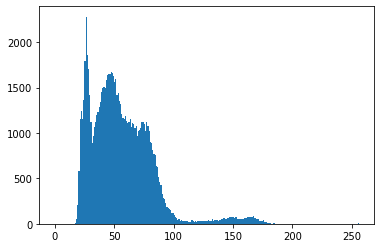

Nombre de carrés total  100
Nuage des points sélectionnés


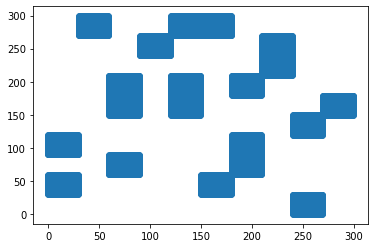

Histogramme des pixels sélectionnés
Nombre de points sélectionnés  18000


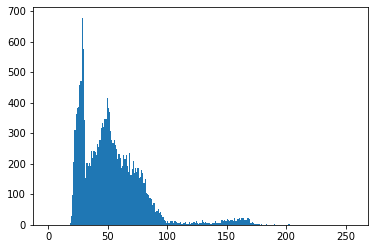

Nombre de pixels sélectionnés  18000
Nombre de pixels non sélectionnés  72000


In [28]:
file = FILE_PATH

I_select, I_nonselect, val_select, val_notselect = selection_pixels(file, selection=SELECTION_RATIO, m=SQUARE_SIZE)

print("Histogramme des pixels sélectionnés")
plt.hist(val_select, 256, density=False, range=(0,256), histtype='barstacked')
print("Nombre de points sélectionnés ", len(I_select))
plt.show()

print("Nombre de pixels sélectionnés ", len(I_select))
print("Nombre de pixels non sélectionnés ", len(I_nonselect))


In [29]:
n=len(val_select)
X=np.array(val_select).reshape((n,1))
et=X.std(axis=0)
moy=X.mean(axis=0)

#scaler=StandardScaler()
#X=scaler.fit_transform(X)

print(X.max(axis=0))
print(X.min(axis=0))

[202]
[18]


### Clustering des pixels sélectionnés par algorithme EM

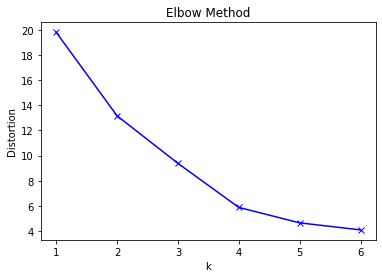

Elbow Method - Number of clusters  4
4  clusters trouvés.
11.052738391856813
26.740398055713865
8.930190433635953
14.818260750987944
Classe 1: alpha= 0.5, lambda= 2, gamma= 11.052738391856813, mu= 51.55991704932617
Classe 2: alpha= 0.5, lambda= 2, gamma= 26.740398055713865, mu= 149.78078078077917
Classe 3: alpha= 0.5, lambda= 2, gamma= 8.930190433635953, mu= 29.16412332606794
Classe 4: alpha= 0.5, lambda= 2, gamma= 14.818260750987944, mu= 77.09372746935881


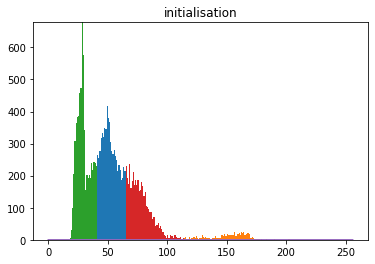


 
 --------------- Etape M n°1 ---------------
 
Classe 1: alpha= 0.19431851362462282, lambda= 1.3413570705708313, gamma= 9.988317299566193, mu= 44.70166053490566
Classe 2: alpha= 0.9660082430634425, lambda= 1.6413037479036805, gamma= 9.99919280431125, mu= 167.87924081093294
Classe 3: alpha= 0.24577872889023755, lambda= 1.2104502961702073, gamma= 8.926347430776978, mu= 25.096338493048517
Classe 4: alpha= 0.31916823839081454, lambda= 1.1500408783893503, gamma= 9.99098412405164, mu= 70.28302565899097

 
 --------------- Etape M n°2 ---------------
 
Classe 1: alpha= 0.2436914301415291, lambda= 1.4145186678430057, gamma= 9.616148970355432, mu= 45.996321446455816
Classe 2: alpha= 0.9532919510303266, lambda= 1.6593041382276765, gamma= 9.866033058539553, mu= 168.18794340273772
Classe 3: alpha= 0.2979785814610838, lambda= 1.3990372276017358, gamma= 9.053030532552903, mu= 25.82349614569868
Classe 4: alpha= 0.2602882552592807, lambda= 1.2840054637115654, gamma= 9.485872039243413, mu= 69.460899

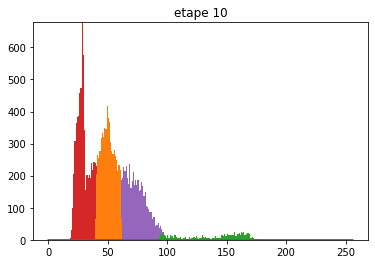

Nombre d'étapes : 10
[0.3481666666666667, 0.049277777777777775, 0.34194444444444444, 0.2606111111111111]
[0, 2, 2, 0, 3, 3, 3, 3, 3]
Classes des pixels sélectionnés (et taille des classes)
 (array([0, 1, 2, 3]), array([6267,  887, 6155, 4691]))


In [30]:
Xr=X.reshape((n,))
labels, params, weights = EBM(Xr, M_max=NMAX_CLUSTERS, k=CONV_POINTS, m=CONV_PARAMS, crit=TOL, M_min=NMIN_CLUSTERS, iter_min=ITER_MIN, iter_max=ITER_MAX)

#labels= model0.predict(X)
print("Classes des pixels sélectionnés (et taille des classes)\n", np.unique(labels, return_counts=True))

Histogramme des pixels sélectionnés avec coloration des classes


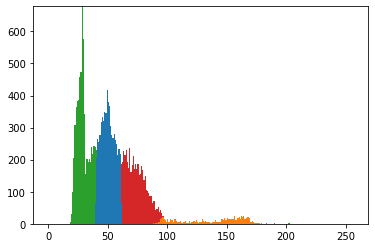

In [31]:
#labels = model.labels_
#labels = model0.predict(X)
unq = np.unique(labels)

clusters0=[]
clusters0_indices = []

for k in unq:
    cluster=[]
    cluster_indices=[]
    
    for i in range(n):
        if labels[i] == k:
            cluster.append(X[i][0])
            cluster_indices.append(I_select[i])
    clusters0.append(cluster)
    clusters0_indices.append(cluster_indices)
    
print("Histogramme des pixels sélectionnés avec coloration des classes")
plt.hist(clusters0, 256, density=False, range=(0,256), histtype='barstacked')
plt.show()

### Méthode 1 : Classification des points restants

In [32]:
labels = np.array(labels)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, labels)

X2 = np.array(val_notselect).reshape(len(val_notselect), 1)

#X2=scaler.transform(X2)

print(X2)

labels2=knn.predict(X2)

np.unique(labels2)

[[26]
 [25]
 [26]
 ...
 [70]
 [66]
 [68]]


array([0, 1, 2, 3])

Histogramme de l'image avec coloration des classes


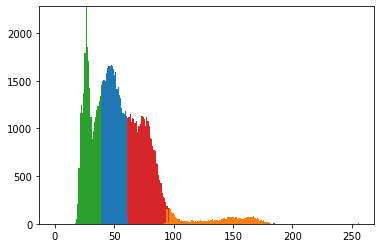

In [33]:
from copy import deepcopy 

clusters1=deepcopy(clusters0)
clusters1_indices = deepcopy(clusters0_indices)

for i in range(X2.shape[0]):
    clusters1[labels2[i]].append(X2[i][0])
    clusters1_indices[labels2[i]].append(I_nonselect[i])
    
print("Histogramme de l'image avec coloration des classes")
plt.hist(clusters1, 256, density=False, range=(0,256), histtype='barstacked')
plt.show()

In [34]:
#Tri des clusters par moyenne
final_means = [np.array(cluster).mean() for cluster in clusters1]

I=np.array(final_means).argsort()

clusters1 = np.array(clusters1)[I]
clusters1_indices = np.array(clusters1_indices)[I]

Image originale


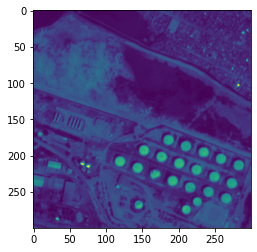

In [35]:
%matplotlib inline

file = "../image1.png"
image = mpimg.imread(file)
shape = image.shape

print("Image originale")
plt.imshow(image)

4
Image après coloration des pixels par classes


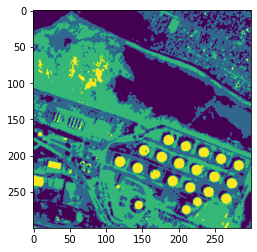

In [36]:
#compute image

image_finale = np.zeros(shape)

M = len(clusters1)

print(M)

for k in range(M):
    for c in clusters1_indices[k]:
        image_finale[c[0],c[1]] = int(k/M * 255)

print("Image après coloration des pixels par classes")
plt.imshow(image_finale)

### Méthode 2 : Clustering des points restants et fusion

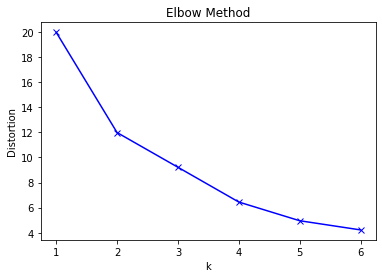

Elbow Method - Number of clusters  5


In [37]:
X2 = np.array(val_notselect).reshape(len(val_notselect), 1)

k=elbow_method(NMAX_CLUSTERS, X2, N=NMIN_CLUSTERS)

[0 1 2 3 4]
Histogramme des pixels non sélectionnés avec coloration des clusters


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 9.],
        [0., 0., 0., ..., 0., 0., 9.],
        [0., 0., 0., ..., 0., 0., 9.],
        [0., 0., 0., ..., 0., 0., 9.]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 1

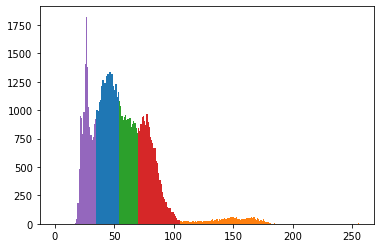

In [38]:
n_clusters=k
X2 = np.array(val_notselect).reshape(len(val_notselect), 1)

model = None

if SECOND_CLUSTERING_METHOD == "kmeans":
    model = KMeans(n_clusters=n_clusters, algorithm="full", random_state=0)
elif SECOND_CLUSTERING_METHOD == "glm":
    model = GaussianMixture(n_components=n_clusters, random_state=0)
    
model.fit(X2)

labels3 = []

if SECOND_CLUSTERING_METHOD == "kmeans":
    labels3 = model.labels_
elif SECOND_CLUSTERING_METHOD == "glm":
    labels3 = model.predict(X2)
    
unq2 = np.unique(labels3)

print(unq2)

clusters2 = [[] for i in range(n_clusters)]
clusters2_indices = [[] for i in range(n_clusters)]

for i in range(X2.shape[0]):
    clusters2[labels3[i]].append(X2[i][0])
    clusters2_indices[labels3[i]].append(I_nonselect[i])

print("Histogramme des pixels non sélectionnés avec coloration des clusters")
plt.hist(clusters2, 256, density=False, range=(0,256), histtype='barstacked')

In [39]:
#weights0 = model0.weights_
#means0 = model0.means_.reshape((5,))
#cov0 = model0.covariances_

weights0 = weights
means0 = [c[-1] for c in params]
cov0 = [c[-2] for c in params]

print("Paramètre du mélange gaussien trouvé sur les pixels sélectionnés\n", weights0, means0, cov0)

print("Taille des clusters ", np.unique(labels3, return_counts=True))

print([len(cluster) for cluster in clusters0])

print([np.array(cluster).mean() for cluster in clusters0])
print([np.array(cluster).var() for cluster in clusters0])

Paramètre du mélange gaussien trouvé sur les pixels sélectionnés
 [0.3481666666666667, 0.049277777777777775, 0.34194444444444444, 0.2606111111111111] [45.01148714473177, 169.22923102344006, 25.280759754014014, 63.307641472150586] [9.627332161839226, 9.865902076707656, 9.074993787811147, 9.526471441140307]
Taille des clusters  (array([0, 1, 2, 3, 4]), array([22921,  2646, 14745, 16732, 14956]))
[6267, 887, 6155, 4691]
[49.73384394447104, 137.24802705749718, 28.75450852965069, 73.65359198465146]
[36.39605101314468, 649.7468253070468, 34.5517566837209, 71.11406671819624]


In [40]:
clusters3=deepcopy(clusters0)
clusters3_indices = deepcopy(clusters0_indices)

print("Tailles des clusters originaux avant fusion\n", [len(cluster) for cluster in clusters3_indices])
print("Nombre des pixels traités ", sum([len(cluster) for cluster in clusters3_indices]))
#TODO:
#Calcul des paramètres des clusters 
#Fusion avec les clusters initiaux
#Affichage de l'image finale
means2 = []
var2 = []
weights2 = []
N = sum([len(cluster) for cluster in clusters2])

print("Poids /", "Moyenne /", "Variance des clusters des pixels non sélectionnés")
for cluster in clusters2:
    mean = np.array(cluster).mean()
    var = np.array(cluster).var()
    weight = len(cluster)/N
    
    print(weight, mean, var)
    
    means2.append(mean)
    var2.append(var)
    weights2.append(weight)

means_gaps = []

#Pour l'instant on regarde juste les moyennes
for i in range(len(weights2)):
    m = []
    for j in range(len(weights0)):
        m.append(abs(means2[i] - means0[j]))
    
    means_gaps.append(m)

print("Matrice des écarts des moyennes entre clusters des pixels sélectionnés et clusters des pixels non sélectionnés\n", np.array(means_gaps), "\n\n")

min_means_gap = []

seuil = ABSOLUTE_FUSION_THRESHOLD

for i in range(len(weights2)):
    t = np.array(means_gaps[i])
    m = np.min(t)
    j = np.argmin(t)
    
    if m < seuil: #on fusionne les clusters
        clusters3[j] += clusters2[i]
        clusters3_indices[j] += clusters2_indices[i]
    else: #on crée un nouveau clusters sinon
        clusters3.append(clusters2[i])
        clusters3_indices.append(clusters2_indices[i])

print("Tailles des clusters finaux après fusion\n", [len(cluster) for cluster in clusters3_indices])
print("Nombre de pixels total traités : ", sum([len(cluster) for cluster in clusters3_indices]))

Tailles des clusters originaux avant fusion
 [6267, 887, 6155, 4691]
Nombre des pixels traités  18000
Poids / Moyenne / Variance des clusters des pixels non sélectionnés
0.3183472222222222 44.20016578683303 27.991345899830286
0.03675 147.25850340136054 461.8371820383482
0.20479166666666668 61.20942692438115 21.343458098169613
0.2323888888888889 80.15485297633278 55.02006789016984
0.20772222222222222 26.806565926718374 16.365431614468857
Matrice des écarts des moyennes entre clusters des pixels sélectionnés et clusters des pixels non sélectionnés
 [[  0.81132136 125.02906524  18.91940603  19.10747569]
 [102.24701626  21.97072762 121.97774365  83.95086193]
 [ 16.19793978 108.0198041   35.92866717   2.09821455]
 [ 35.14336583  89.07437805  54.87409322  16.8472115 ]
 [ 18.20492122 142.4226651    1.52580617  36.50107555]] 


Tailles des clusters finaux après fusion
 [29188, 887, 21111, 19436, 2646, 16732]
Nombre de pixels total traités :  90000


In [41]:
#Tri des clusters par moyenne
final_means = [np.array(cluster).mean() for cluster in clusters3]

I=np.array(final_means).argsort()

clusters3 = np.array(clusters3)[I]
clusters3_indices = np.array(clusters3_indices)[I]

Nombre de clusters des pixels non sélectionnés : 6
Image après fusion des clusters


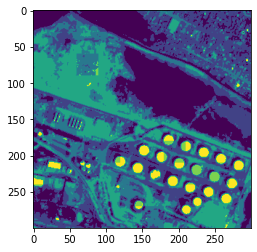

In [42]:
#compute image

image_finale2 = np.zeros(shape)

M = len(clusters3)

print("Nombre de clusters des pixels non sélectionnés :", M)

for k in range(M):
    for c in clusters3_indices[k]:
        image_finale2[c[0],c[1]] = int(k/M * 255)

print("Image après fusion des clusters")
plt.imshow(image_finale2)

Classification / Image original / Clustering + Fusion


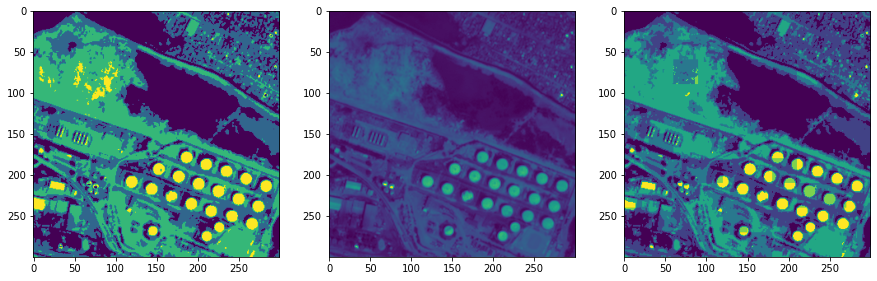

In [43]:
print("Classification / Image original / Clustering + Fusion")
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(image_finale)
fig.add_subplot(1, 3, 2)
plt.imshow(image)
fig.add_subplot(1, 3, 3)
plt.imshow(image_finale2)
plt.show()

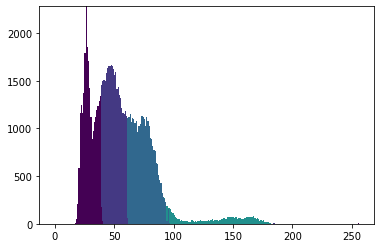

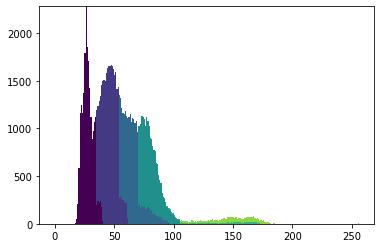

In [46]:
import matplotlib.colors as colors

cm = plt.get_cmap('viridis')

plt.hist(clusters1, 256, density=False, range=(0,256), histtype='barstacked', color = [cm(int(k/M * 255)) for k in range(len(clusters1))])
plt.show()
plt.hist(clusters3, 256, density=False, range=(0,256), histtype='barstacked', color = [cm(int(k/M * 255)) for k in range(M)])
plt.show()
